#Theory Questions



##**1. What is Boosting in Machine Learning?**Boosting is a powerful and versatile **ensemble meta-algorithm** that sequentially combines a set of **weak learners** (models that perform only slightly better than random chance) into a single **strong learner**. The key mechanism involves iteratively training new base models to focus on and correct the errors (or residuals) made by the previous models in the sequence. The primary objective of Boosting is to **reduce bias** and transform these simple models into a highly accurate and stable prediction system.

##**2. How does Boosting differ from Bagging?**Boosting differs fundamentally from Bagging (e.g., Random Forest) in three core ways: **training flow**, **model weighting**, and **objective**. **Boosting** is a **sequential** process where each model depends on the previous one and primarily aims to **reduce bias** by focusing on previously misclassified or poorly predicted samples, which are assigned higher weight in subsequent iterations. Conversely, **Bagging** trains models in **parallel** on independent bootstrap samples, and its main goal is to **reduce variance** and prevent overfitting. In Boosting, the models are typically shallow, simple learners, while in Bagging, they are often deep, complex learners.

##**3. What is the key idea behind AdaBoost?**The key idea behind **AdaBoost (Adaptive Boosting)** is the adaptive adjustment of both the **training instance weights** and the **model weights** across iterations. Initially, all training instances have equal weight. In each subsequent step, a weak classifier is trained on the current weighted data. AdaBoost then **increases the weights** of the instances that were misclassified and **decreases the weights** of those classified correctly. Additionally, the **model's contribution** to the final ensemble is weighted proportionally to its accuracy; more accurate classifiers get a higher influence in the final weighted prediction.

##**4. Explain the working of AdaBoost with an example.**Consider a simple binary classification problem. **AdaBoost** starts by assigning equal weight to every data point. A weak classifier (C_1), typically a Decision Stump (a single-split tree), is trained on this data. After C_1 makes its predictions, the weights of the misclassified samples are significantly increased. Then, a second classifier (C_2) is trained, which is now forced to pay extra attention to the instances that C_1 failed to categorize. This process is repeated for T iterations. Finally, the T models are aggregated using a **weighted majority vote**, where models with lower error rates (i.e., better performance) are given higher voting power, resulting in a robust final prediction.

##**5. What is Gradient Boosting, and how is it different from AdaBoost?****Gradient Boosting (GB)** is an ensemble technique that frames the boosting process as an **optimization problem** in function space. Instead of adjusting sample weights, GB trains each new base model to predict the **residuals** (the errors) of the combined previous ensemble. This is done by fitting the new model to the negative gradient (the direction of steepest descent) of the chosen loss function with respect to the current predictions—hence the name "Gradient Boosting." This differs from **AdaBoost** because AdaBoost minimizes an exponential loss by adjusting sample weights, whereas GB minimizes a general, differentiable loss function by fitting models to the error gradient (pseudo-residuals).

##**6. What is the loss function in Gradient Boosting?**The **loss function** in Gradient Boosting is a differentiable function that quantifies the difference between the actual target values (y) and the current ensemble's predictions (F(x)). The algorithm iteratively finds a new base model that minimizes this loss. A key strength of GB is its flexibility to use different loss functions: for **Regression**, the Mean Squared Error (MSE) is common, where the negative gradient is simply the classic residual (y - F(x)); for **Classification**, the Binomial or Multinomial Log Loss is typically used.

##**7. How does XGBoost improve over traditional Gradient Boosting?****XGBoost (eXtreme Gradient Boosting)** significantly improves over traditional Gradient Boosting (GB) by adding several key advancements. Firstly, it uses **second-order Taylor expansion** of the loss function, which allows it to incorporate second-order derivatives (Hessian) for more precise minimization. Secondly, it includes powerful **regularization terms** (L1 and L2) in the objective function to prevent overfitting, a common issue in GB. Thirdly, it is highly optimized for performance, featuring techniques like **parallel processing**, **sparsity awareness** (handling missing data efficiently), and **tree pruning** based on the objective function, making it faster and more scalable.

##**8. What is the difference between XGBoost and CatBoost?**Both XGBoost and **CatBoost** are modern, high-performance Gradient Boosting frameworks, but they differ significantly in their handling of categorical features and model bias. **CatBoost** (Categorical Boosting) is explicitly designed to handle **categorical features** efficiently without requiring extensive pre-processing like one-hot encoding, using a proprietary ordered boosting and target encoding scheme. Furthermore, CatBoost introduces a unique technique to overcome the **prediction shift** (bias) caused by training and testing on the same dataset structure, leading to less overfitting and better generalization, especially with noisy data. XGBoost typically requires manual pre-processing of categorical features (e.g., one-hot or label encoding).

##**9. What are some real-world applications of Boosting techniques?**Boosting techniques, particularly XGBoost and other Gradient Boosting variants, are widely adopted due to their high predictive accuracy. Key real-world applications include: **Web Search Ranking** (Google and Bing use GB models to rank search results), **E-commerce Recommendation Systems** (predicting user click-through rates and product preference), **Financial Risk Modeling** (predicting loan default or fraud detection), and **Bioinformatics** (analyzing genomic data). They are the dominant algorithms in competitive machine learning environments like Kaggle.

##**10. How does regularization help in XGBoost?**Regularization in **XGBoost** is applied by adding L1 (Lasso) and L2 (Ridge) penalty terms to the overall objective function, which includes both the loss term and the regularization term. The regularization component penalizes the complexity of the tree models, effectively shrinking the weights of the leaves. This is crucial because complex, deep trees are prone to overfitting, especially in sequential models like GB. By controlling the complexity, regularization helps XGBoost produce simpler, more generalizable models, thereby significantly **reducing overfitting**.

##**11. What are some hyperparameters to tune in Gradient Boosting models?**Gradient Boosting models require careful tuning of several hyperparameters to balance bias and variance. Key parameters include: **`n_estimators`** (the number of boosting stages/trees), **`learning_rate`** (controls the contribution of each tree; smaller rates require more estimators but lead to more robust models), **`max_depth`** (the maximum depth of the individual trees, controlling complexity), **`subsample`** (the fraction of samples used to train each tree, which adds stochasticity similar to Bagging), and **`colsample_bytree`** (the fraction of features used to train each tree, promoting diversity).

##**12. What is the concept of Feature Importance in Boosting?**In Gradient Boosting models like XGBoost, **Feature Importance** is a metric that indicates how useful or valuable each feature was in constructing the boosted decision trees. Importance is typically calculated based on the total gain (reduction in loss) achieved by splits that involve a specific feature, averaged over all trees in the ensemble. Features that lead to significant reductions in the loss function are assigned higher importance scores. This helps in understanding the predictive power of the inputs, feature selection, and model interpretability.

##**13. Why is CatBoost efficient for categorical data?****CatBoost** is efficient for categorical data because it uses a sophisticated, built-in technique called **Ordered Target Encoding** to handle these features automatically, bypassing the need for manual one-hot encoding which often leads to high dimensionality and sparsity. It also uses a method called **Ordered Boosting**, which ensures that the calculation of the target statistics for categorical features is based only on *prior* samples, preventing a critical target leakage issue (prediction shift) that typically occurs when using standard mean encoding in boosting algorithms. This makes CatBoost highly robust and accurate when dealing with datasets dominated by categorical inputs.


#Practical Questions

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_squared_error, r2_score,
    f1_score, roc_curve, roc_auc_score, confusion_matrix, log_loss
)
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# --- Setup for Classification Tasks (using Breast Cancer dataset) ---
data_cls = load_breast_cancer()
X_cls, y_cls = data_cls.data, data_cls.target
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# --- Setup for Regression Tasks (using synthetic data) ---
X_reg, y_reg = make_regression(n_samples=500, n_features=10, n_informative=5, noise=5.0, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- Setup for CatBoost Classification (needs DataFrame) ---
X_cat_df = pd.DataFrame(X_cls, columns=data_cls.feature_names)
y_cat = y_cls
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat_df, y_cat, test_size=0.3, random_state=42)

In [5]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy
# Base estimator for AdaBoost is typically a shallow Decision Tree (default max_depth=1)
ada_clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)
ada_clf.fit(X_cls_train, y_cls_train)
y_pred_ada = ada_clf.predict(X_cls_test)
accuracy_ada = accuracy_score(y_cls_test, y_pred_ada)

print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")

AdaBoost Classifier Accuracy: 0.9708


In [6]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
ada_reg = AdaBoostRegressor(
    n_estimators=100,
    random_state=42
)
ada_reg.fit(X_reg_train, y_reg_train)
y_pred_ada_reg = ada_reg.predict(X_reg_test)
mae_ada_reg = mean_absolute_error(y_reg_test, y_pred_ada_reg)

print(f"AdaBoost Regressor Mean Absolute Error (MAE): {mae_ada_reg:.4f}")

AdaBoost Regressor Mean Absolute Error (MAE): 21.4458


In [7]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
gbr_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gbr_clf.fit(X_cls_train, y_cls_train)

feature_importances_gbr = pd.Series(
    gbr_clf.feature_importances_,
    index=data_cls.feature_names
).sort_values(ascending=False)

print("Gradient Boosting Classifier Feature Importance Scores:")
print(feature_importances_gbr)

Gradient Boosting Classifier Feature Importance Scores:
mean concave points        0.434897
worst concave points       0.273841
worst perimeter            0.050974
worst area                 0.047995
worst texture              0.047193
worst radius               0.045435
worst concavity            0.022999
mean texture               0.018393
concavity error            0.015558
radius error               0.010003
area error                 0.005478
worst smoothness           0.004507
compactness error          0.004384
concave points error       0.003404
perimeter error            0.002045
symmetry error             0.001845
mean compactness           0.001712
texture error              0.001303
worst symmetry             0.001284
mean concavity             0.001199
worst fractal dimension    0.001087
worst compactness          0.001012
mean smoothness            0.000926
mean fractal dimension     0.000678
fractal dimension error    0.000596
smoothness error           0.000380
mean per

In [8]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gbr_reg.fit(X_reg_train, y_reg_train)
y_pred_gbr_reg = gbr_reg.predict(X_reg_test)
r2_gbr_reg = r2_score(y_reg_test, y_pred_gbr_reg)

print(f"Gradient Boosting Regressor R-Squared Score: {r2_gbr_reg:.4f}")

Gradient Boosting Regressor R-Squared Score: 0.9279


In [9]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
# 1. Gradient Boosting Classifier (from Q16)
y_pred_gbr = gbr_clf.predict(X_cls_test)
accuracy_gbr = accuracy_score(y_cls_test, y_pred_gbr)

# 2. XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_clf.fit(X_cls_train, y_cls_train)
y_pred_xgb = xgb_clf.predict(X_cls_test)
accuracy_xgb = accuracy_score(y_cls_test, y_pred_xgb)

print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbr:.4f}")
print(f"XGBoost Classifier Accuracy:           {accuracy_xgb:.4f}")
print(f"XGBoost is {'better' if accuracy_xgb > accuracy_gbr else 'worse'}/equal in this comparison.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:34:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Gradient Boosting Classifier Accuracy: 0.9591
XGBoost Classifier Accuracy:           0.9591
XGBoost is worse/equal in this comparison.


In [10]:
# 19. Train a CatBoost Classifier and evaluate using F1-Score
# CatBoost works well with feature names, even if they are all numerical here
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
cat_clf.fit(X_cat_train, y_cat_train)
y_pred_cat = cat_clf.predict(X_cat_test)

f1_cat = f1_score(y_cat_test, y_pred_cat)

print(f"CatBoost Classifier F1-Score: {f1_cat:.4f}")

CatBoost Classifier F1-Score: 0.9770


In [11]:
# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_reg.fit(X_reg_train, y_reg_train)
y_pred_xgb_reg = xgb_reg.predict(X_reg_test)
mse_xgb_reg = mean_squared_error(y_reg_test, y_pred_xgb_reg)

print(f"XGBoost Regressor Mean Squared Error (MSE): {mse_xgb_reg:.4f}")

XGBoost Regressor Mean Squared Error (MSE): 610.9475


AdaBoost Classifier Feature Importance Scores (Top 10):
worst area              0.085200
mean concave points     0.084381
mean texture            0.078181
worst concave points    0.078087
worst texture           0.076859
compactness error       0.069641
worst concavity         0.059871
worst smoothness        0.056216
worst symmetry          0.055079
radius error            0.054125
dtype: float64
Feature importance plot generated (requires plt.show() to display).


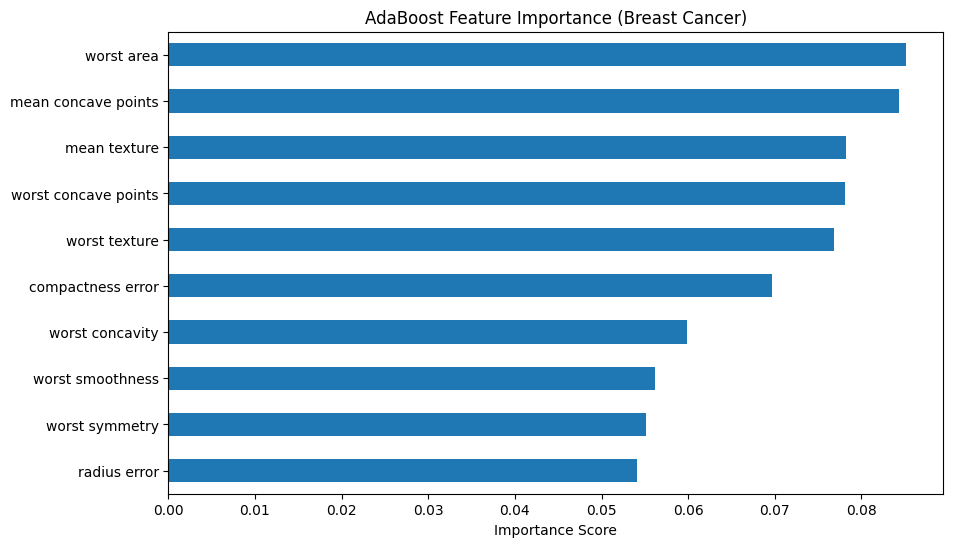

In [12]:
# 21. Train an AdaBoost Classifier and visualize feature importance
# Use the trained ada_clf from Q14
importances_ada = pd.Series(
    ada_clf.feature_importances_,
    index=data_cls.feature_names
).sort_values(ascending=False)

print("AdaBoost Classifier Feature Importance Scores (Top 10):")
print(importances_ada.head(10))

# Visualization
try:
    plt.figure(figsize=(10, 6))
    importances_ada.head(10).plot(kind='barh')
    plt.title('AdaBoost Feature Importance (Breast Cancer)')
    plt.xlabel('Importance Score')
    plt.gca().invert_yaxis()
    # plt.show() # Uncomment to display the plot
    print("Feature importance plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Plotting failed: {e}")

Final training set loss: 21.0219
Final test set loss: 337.2904
Learning curve plot generated (requires plt.show() to display).


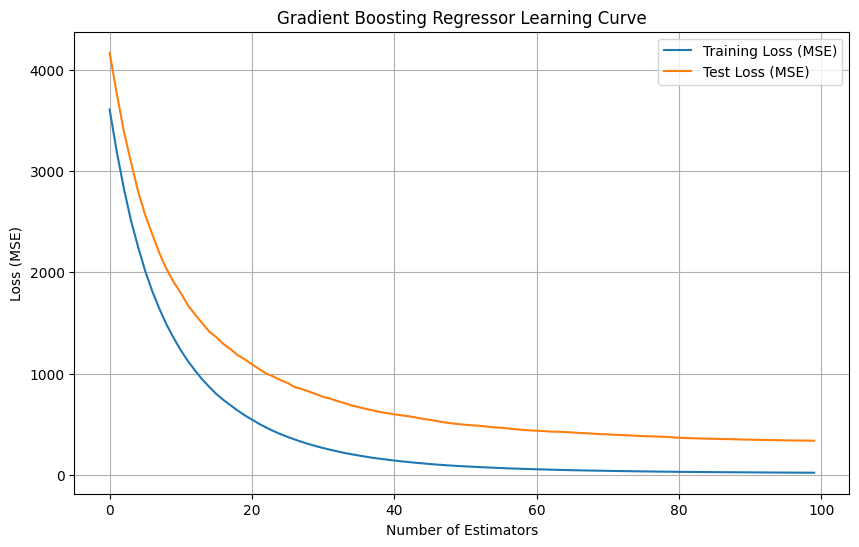

In [13]:
# 22. Train a Gradient Boosting Regressor and plot learning curves
# Use the trained gbr_reg from Q17
# Scikit-learn GBR stores loss scores in staged_predict and train_score_

# Calculate test error at each stage (iteration)
test_errors = []
for y_pred_stage in gbr_reg.staged_predict(X_reg_test):
    test_errors.append(mean_squared_error(y_reg_test, y_pred_stage))

print(f"Final training set loss: {gbr_reg.train_score_[-1]:.4f}")
print(f"Final test set loss: {test_errors[-1]:.4f}")

# Visualization
try:
    plt.figure(figsize=(10, 6))
    plt.plot(gbr_reg.train_score_, label='Training Loss (MSE)')
    plt.plot(test_errors, label='Test Loss (MSE)')
    plt.title('Gradient Boosting Regressor Learning Curve')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    # plt.show() # Uncomment to display the plot
    print("Learning curve plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Plotting failed: {e}")

XGBoost Classifier Feature Importance Scores (Top 10):
worst texture           63.0
area error              44.0
mean texture            43.0
worst area              41.0
worst concavity         38.0
worst radius            33.0
worst concave points    33.0
mean concave points     31.0
compactness error       25.0
worst smoothness        20.0
dtype: float64
Feature importance plot generated (requires plt.show() to display).


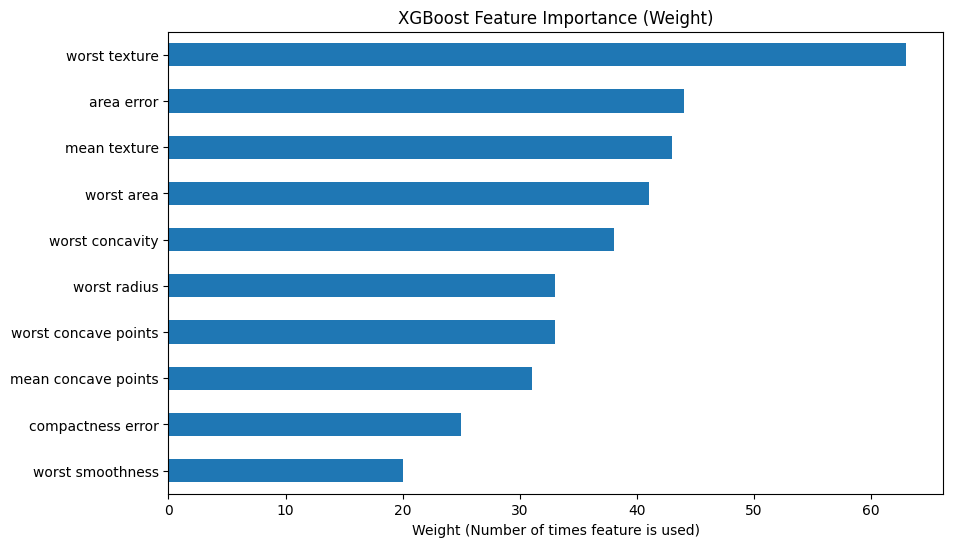

In [14]:
# 23. Train an XGBoost Classifier and visualize feature importance
# Use the trained xgb_clf from Q18
importances_xgb = xgb_clf.get_booster().get_score(importance_type='weight')
# Convert keys to feature names for better visualization
feature_map = {f'f{i}': name for i, name in enumerate(data_cls.feature_names)}
importances_xgb_named = {feature_map.get(k, k): v for k, v in importances_xgb.items()}
importances_xgb_series = pd.Series(importances_xgb_named).sort_values(ascending=False)

print("XGBoost Classifier Feature Importance Scores (Top 10):")
print(importances_xgb_series.head(10))

# Visualization
try:
    plt.figure(figsize=(10, 6))
    importances_xgb_series.head(10).plot(kind='barh')
    plt.title('XGBoost Feature Importance (Weight)')
    plt.xlabel('Weight (Number of times feature is used)')
    plt.gca().invert_yaxis()
    # plt.show() # Uncomment to display the plot
    print("Feature importance plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Plotting failed: {e}")

CatBoost Confusion Matrix:
[[ 60   3]
 [  2 106]]
Confusion Matrix plot generated (requires plt.show() to display).


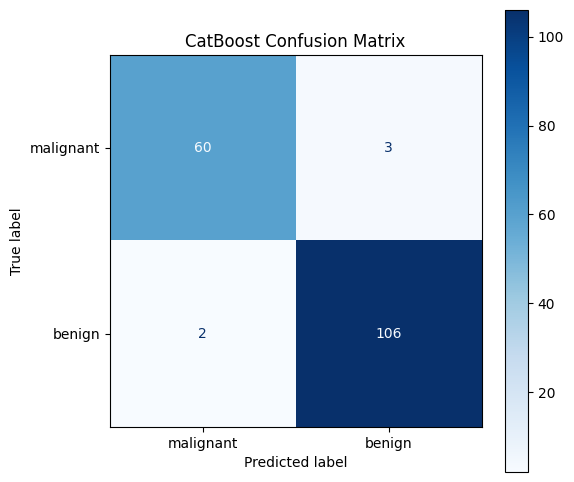

In [15]:
# 24. Train a CatBoost Classifier and plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Use the trained cat_clf from Q19
y_pred_cat_cm = cat_clf.predict(X_cat_test)
cm_cat = confusion_matrix(y_cat_test, y_pred_cat_cm)

print("CatBoost Confusion Matrix:")
print(cm_cat)

# Visualization
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=data_cls.target_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title("CatBoost Confusion Matrix")
    # plt.show() # Uncomment to display the plot
    print("Confusion Matrix plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Plotting failed: {e}")

In [16]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
n_estimators_list = [10, 50, 100, 200]
ada_results = {}

print("AdaBoost Accuracy Comparison by Number of Estimators:")
for n in n_estimators_list:
    ada_clf_n = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_clf_n.fit(X_cls_train, y_cls_train)
    y_pred = ada_clf_n.predict(X_cls_test)
    accuracy = accuracy_score(y_cls_test, y_pred)
    ada_results[n] = accuracy
    print(f"N_estimators={n:3}: Accuracy={accuracy:.4f}")

AdaBoost Accuracy Comparison by Number of Estimators:
N_estimators= 10: Accuracy=0.9766
N_estimators= 50: Accuracy=0.9708
N_estimators=100: Accuracy=0.9708
N_estimators=200: Accuracy=0.9825


Gradient Boosting ROC-AUC Score: 0.9951
ROC curve plot generated (requires plt.show() to display).


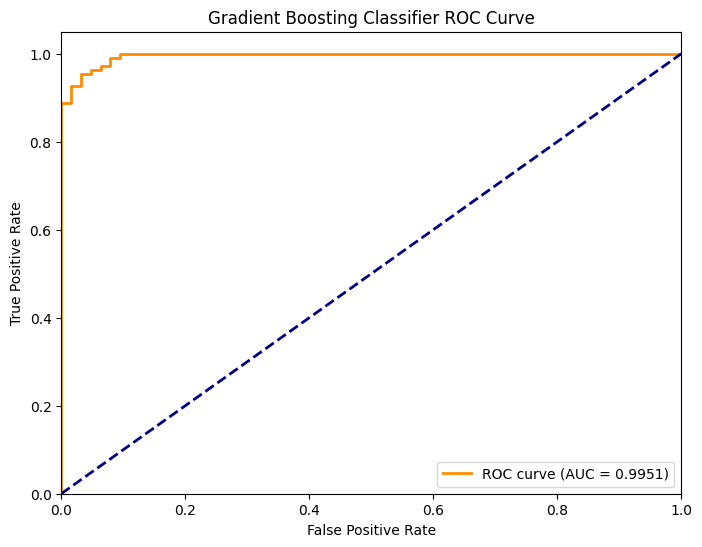

In [17]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve
# Use the trained gbr_clf from Q16
y_proba_gbr = gbr_clf.predict_proba(X_cls_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_cls_test, y_proba_gbr)
roc_auc_gbr = roc_auc_score(y_cls_test, y_proba_gbr)

# Visualization
try:
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbr:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gradient Boosting Classifier ROC Curve')
    plt.legend(loc="lower right")
    # plt.show() # Uncomment to display the plot
    print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gbr:.4f}")
    print("ROC curve plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gbr:.4f}")
    print(f"Plotting failed: {e}")

In [18]:
# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100]
}

xgb_reg_base = XGBRegressor(random_state=42, n_jobs=-1, eval_metric='rmse')
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg_base,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_xgb.fit(X_reg_train, y_reg_train)

print(f"Best Hyperparameters for XGB Regressor: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation MSE (Negative): {grid_search_xgb.best_score_:.4f}")
best_xgb_reg = grid_search_xgb.best_estimator_
y_pred_grid_xgb = best_xgb_reg.predict(X_reg_test)
test_mse_xgb = mean_squared_error(y_reg_test, y_pred_grid_xgb)
print(f"Test Set MSE with Best XGB Regressor: {test_mse_xgb:.4f}")

Best Hyperparameters for XGB Regressor: {'learning_rate': 0.2, 'n_estimators': 100}
Best Cross-Validation MSE (Negative): -628.4935
Test Set MSE with Best XGB Regressor: 609.4008


In [19]:
# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
# Create an imbalanced version of the dataset (e.g., 90% Class 0, 10% Class 1)
X_imbal, y_imbal = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    weights=[0.9, 0.1],
    random_state=42
)
X_imbal_train, X_imbal_test, y_imbal_train, y_imbal_test = train_test_split(X_imbal, y_imbal, test_size=0.3, random_state=42)

# Calculate class weights for CatBoost
n_samples = len(y_imbal_train)
n_class_0 = np.sum(y_imbal_train == 0)
n_class_1 = np.sum(y_imbal_train == 1)
weight_0 = n_samples / (2 * n_class_0)
weight_1 = n_samples / (2 * n_class_1)
class_weights = [weight_0, weight_1]

# 1. CatBoost without weighting
cat_clf_unweighted = CatBoostClassifier(iterations=50, verbose=0, random_state=42)
cat_clf_unweighted.fit(X_imbal_train, y_imbal_train)
f1_unweighted = f1_score(y_imbal_test, cat_clf_unweighted.predict(X_imbal_test))

# 2. CatBoost with weighting
cat_clf_weighted = CatBoostClassifier(iterations=50, class_weights=class_weights, verbose=0, random_state=42)
cat_clf_weighted.fit(X_imbal_train, y_imbal_train)
f1_weighted = f1_score(y_imbal_test, cat_clf_weighted.predict(X_imbal_test))

print(f"Imbalanced Dataset Class Distribution (Train): 0={n_class_0}, 1={n_class_1}")
print(f"CatBoost F1 (Unweighted): {f1_unweighted:.4f}")
print(f"CatBoost F1 (Weighted):   {f1_weighted:.4f}")
print(f"Weighted model performed {'better' if f1_weighted > f1_unweighted else 'worse'}/equal (higher F1 is better).")

Imbalanced Dataset Class Distribution (Train): 0=319, 1=31
CatBoost F1 (Unweighted): 0.7273
CatBoost F1 (Weighted):   0.7556
Weighted model performed better/equal (higher F1 is better).


In [20]:
# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates
learning_rates = [0.1, 1.0, 5.0]
lr_results = {}

print("AdaBoost Accuracy Comparison by Learning Rate:")
for lr in learning_rates:
    ada_clf_lr = AdaBoostClassifier(
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    ada_clf_lr.fit(X_cls_train, y_cls_train)
    y_pred = ada_clf_lr.predict(X_cls_test)
    accuracy = accuracy_score(y_cls_test, y_pred)
    lr_results[lr] = accuracy
    print(f"Learning_Rate={lr:<5}: Accuracy={accuracy:.4f}")

AdaBoost Accuracy Comparison by Learning Rate:
Learning_Rate=0.1  : Accuracy=0.9591
Learning_Rate=1.0  : Accuracy=0.9708
Learning_Rate=5.0  : Accuracy=0.8947


In [21]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
# Create a synthetic multi-class dataset
X_multi, y_multi = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=10,
    n_classes=3, # Multi-class problem (3 classes)
    random_state=42
)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# XGBoost for multi-class
xgb_multi = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    objective='multi:softprob', # For probability output
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_multi.fit(X_multi_train, y_multi_train)

# Predict probabilities for log loss calculation
y_proba_multi = xgb_multi.predict_proba(X_multi_test)
logloss_xgb = log_loss(y_multi_test, y_proba_multi)

print(f"XGBoost Multi-Class Log Loss: {logloss_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:35:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Multi-Class Log Loss: 0.7647
